# Analysis of Lahman Data

See percentage of hit types over time

## STEP 1: Import Packages

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

## STEP 2: Read in data

In [10]:
batting_df = pd.read_csv('./data/core/Batting.csv',
                        delimiter=',',
                        usecols=['yearID','H','2B','3B','HR'])
batting_df.head(5)

,yearID,H,2B,3B,HR
0,1871,0,0,0,0
1,1871,32,6,0,0
2,1871,40,4,5,0
3,1871,44,10,2,2
4,1871,39,11,3,0


## STEP 3: Calculate distributions of hit types over the years

In [35]:
batting_years_df = batting_df.groupby(['yearID'], as_index=False).sum()
batting_years_df['S'] = batting_years_df['H'] - batting_years_df['2B'] - batting_years_df['3B'] - batting_years_df['HR']
batting_years_df['S_PERC'] = batting_years_df['S'] / batting_years_df['H']
batting_years_df['2B_PERC'] = batting_years_df['2B'] / batting_years_df['H']
batting_years_df['3B_PERC'] = batting_years_df['3B'] / batting_years_df['H']
batting_years_df['HR_PERC'] = batting_years_df['HR'] / batting_years_df['H']
batting_years_df

,yearID,H,2B,3B,HR,S,S_PERC,2B_PERC,3B_PERC,HR_PERC
0,1871,3101,434,239,47,2381,0.767817,0.139955,0.077072,0.015156
1,1872,4467,581,145,37,3704,0.829192,0.130065,0.032460,0.008283
2,1873,4926,570,211,47,4098,0.831912,0.115713,0.042834,0.009541
3,1874,5224,634,194,40,4356,0.833844,0.121363,0.037136,0.007657
4,1875,6812,839,273,40,5660,0.830887,0.123165,0.040076,0.005872
...,...,...,...,...,...,...,...,...,...,...
143,2014,41595,8137,849,4186,28423,0.683327,0.195624,0.020411,0.100637
144,2015,42106,8242,939,4909,28016,0.665368,0.195744,0.022301,0.116587
145,2016,42276,8254,873,5610,27539,0.651410,0.195241,0.020650,0.132699
146,2017,42215,8397,795,6105,26918,0.637641,0.198910,0.018832,0.144617


<Figure size 432x288 with 0 Axes>

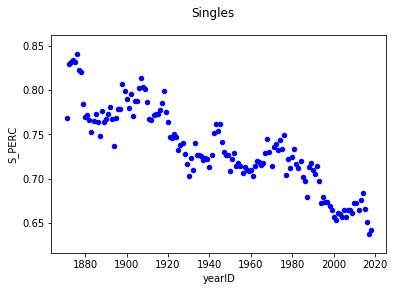

<Figure size 432x288 with 0 Axes>

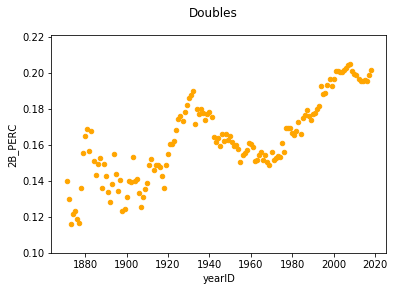

<Figure size 432x288 with 0 Axes>

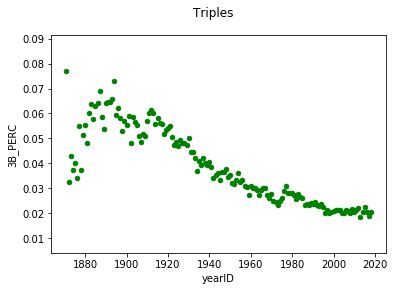

<Figure size 432x288 with 0 Axes>

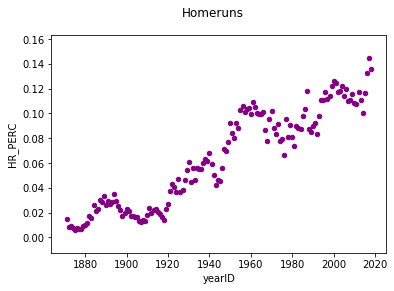

<Figure size 432x288 with 0 Axes>

In [28]:
batting_years_df.plot(kind='scatter',x='yearID',y='S_PERC',color='blue')
plt.suptitle("Singles")
plt.figure()

batting_years_df.plot(kind='scatter',x='yearID',y='2B_PERC',color='orange')
plt.suptitle("Doubles")
plt.figure()

batting_years_df.plot(kind='scatter',x='yearID',y='3B_PERC',color='green')
plt.suptitle("Triples")
plt.figure()

batting_years_df.plot(kind='scatter',x='yearID',y='HR_PERC',color='purple')
plt.suptitle("Homeruns")
plt.figure()

In [29]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=batting_years_df['yearID'], y=batting_years_df['S_PERC'],
                    mode='lines',
                    name='S'))
fig.add_trace(go.Scatter(x=batting_years_df['yearID'], y=batting_years_df['2B_PERC'],
                    mode='lines',
                    name='2B'))
fig.add_trace(go.Scatter(x=batting_years_df['yearID'], y=batting_years_df['3B_PERC'],
                    mode='lines',
                    name='3B'))
fig.add_trace(go.Scatter(x=batting_years_df['yearID'], y=batting_years_df['HR_PERC'],
                    mode='lines',
                    name='HR'))
fig.show()

In [33]:
fig = go.Figure(data=[
    go.Bar(name='S', x=batting_years_df['yearID'], y=batting_years_df['S_PERC']),
    go.Bar(name='2B', x=batting_years_df['yearID'], y=batting_years_df['2B_PERC']),
    go.Bar(name='3B', x=batting_years_df['yearID'], y=batting_years_df['3B_PERC']),
    go.Bar(name='HR', x=batting_years_df['yearID'], y=batting_years_df['HR_PERC'])
])
fig.update_layout(barmode='stack')
fig.show()

## STEP 4: Calculate plate appearance distributions over time

In [46]:
batting_all_df = pd.read_csv('./data/core/Batting.csv',
                        delimiter=',',
                        usecols=['yearID','AB','H','2B','3B','HR','BB','SO','IBB','HBP','SH','SF','GIDP'])
batting_all_df.head(5)

,yearID,AB,H,2B,3B,HR,BB,SO,IBB,HBP,SH,SF,GIDP
0,1871,4,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,1871,118,32,6,0,0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,1871,137,40,4,5,0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,1871,133,44,10,2,2,0,2.0,NaN,NaN,NaN,NaN,0.0
4,1871,120,39,11,3,0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [48]:
# Filter to 1970+ so I can properly calculate PA using IBB, HBP, SH, and SF
batting_filtered_df = batting_all_df[batting_all_df['yearID'] >= 1970]
batting_filtered_df = batting_filtered_df.groupby(['yearID'], as_index=False).sum()
batting_filtered_df['PA'] = batting_filtered_df['AB'] + batting_filtered_df['BB'] + batting_filtered_df['IBB'] + batting_filtered_df['HBP'] + batting_filtered_df['SH'] + batting_filtered_df['SF']
batting_filtered_df['OTHER_OUT'] = batting_filtered_df['PA'] - batting_filtered_df['H'] - batting_filtered_df['BB'] - batting_filtered_df['SO'] - batting_filtered_df['IBB'] - batting_filtered_df['HBP'] - batting_filtered_df['SH'] - batting_filtered_df['SF'] - batting_filtered_df['GIDP']
batting_filtered_df['S'] = batting_filtered_df['H'] - batting_filtered_df['2B'] - batting_filtered_df['3B'] - batting_filtered_df['HR']


batting_filtered_df['S_PERC'] = batting_filtered_df['S'] / batting_filtered_df['PA']
batting_filtered_df['2B_PERC'] = batting_filtered_df['2B'] / batting_filtered_df['PA']
batting_filtered_df['3B_PERC'] = batting_filtered_df['3B'] / batting_filtered_df['PA']
batting_filtered_df['HR_PERC'] = batting_filtered_df['HR'] / batting_filtered_df['PA']
batting_filtered_df['BB_PERC'] = batting_filtered_df['BB'] / batting_filtered_df['PA']
batting_filtered_df['SO_PERC'] = batting_filtered_df['SO'] / batting_filtered_df['PA']
batting_filtered_df['IBB_PERC'] = batting_filtered_df['IBB'] / batting_filtered_df['PA']
batting_filtered_df['HBP_PERC'] = batting_filtered_df['HBP'] / batting_filtered_df['PA']
batting_filtered_df['SH_PERC'] = batting_filtered_df['SH'] / batting_filtered_df['PA']
batting_filtered_df['SF_PERC'] = batting_filtered_df['SF'] / batting_filtered_df['PA']
batting_filtered_df['GIDP_PERC'] = batting_filtered_df['GIDP'] / batting_filtered_df['PA']
batting_filtered_df['OTHER_OUT_PERC'] = batting_filtered_df['OTHER_OUT'] / batting_filtered_df['PA']

batting_filtered_df

,yearID,AB,H,2B,3B,HR,BB,SO,IBB,HBP,...,3B_PERC,HR_PERC,BB_PERC,SO_PERC,IBB_PERC,HBP_PERC,SH_PERC,SF_PERC,GIDP_PERC,OTHER_OUT_PERC
0,1970,132140,33555,5235,927,3429,13727,22374.0,1464.0,825.0,...,0.006148,0.022742,0.091042,0.148392,0.009710,0.005472,0.010811,0.006566,0.020050,0.485409
1,1971,130544,32547,4931,808,2863,12536,20956.0,1396.0,821.0,...,0.005456,0.019333,0.084654,0.141512,0.009427,0.005544,0.012169,0.006665,0.020873,0.499372
2,1972,124828,30434,4652,746,2534,11727,20718.0,1378.0,751.0,...,0.005279,0.017930,0.082979,0.146598,0.009751,0.005314,0.012439,0.006248,0.019791,0.501532
3,1973,132363,34010,5224,790,3102,13100,20358.0,1357.0,755.0,...,0.005262,0.020662,0.087255,0.135599,0.009039,0.005029,0.010324,0.006721,0.020841,0.498661
4,1974,132256,33969,5206,847,2649,12963,19495.0,1353.0,774.0,...,0.005640,0.017638,0.086314,0.129807,0.009009,0.005154,0.011546,0.007351,0.020528,0.504108
5,1975,131473,33863,5443,887,2698,13402,19280.0,1338.0,761.0,...,0.005916,0.017995,0.089386,0.128590,0.008924,0.005076,0.012492,0.007250,0.020102,0.502328
6,1976,131525,33598,5240,966,2235,12391,18745.0,1156.0,684.0,...,0.006495,0.015027,0.083311,0.126032,0.007772,0.004599,0.012055,0.007954,0.019565,0.512815
7,1977,143975,38037,6441,1170,3644,13757,21722.0,1297.0,791.0,...,0.007186,0.022381,0.084495,0.133415,0.007966,0.004858,0.010834,0.007561,0.019280,0.497970
8,1978,141567,36508,6186,1020,2956,13566,20058.0,1338.0,772.0,...,0.006355,0.018417,0.084522,0.124970,0.008336,0.004810,0.012374,0.007938,0.019165,0.510427
9,1979,142792,37911,6415,1066,3433,13601,20035.0,1366.0,754.0,...,0.006592,0.021228,0.084101,0.123885,0.008447,0.004662,0.011724,0.008125,0.020566,0.504072


In [51]:
fig = go.Figure(data=[
    go.Bar(name='S', x=batting_filtered_df['yearID'], y=batting_filtered_df['S_PERC']),
    go.Bar(name='2B', x=batting_filtered_df['yearID'], y=batting_filtered_df['2B_PERC']),
    go.Bar(name='3B', x=batting_filtered_df['yearID'], y=batting_filtered_df['3B_PERC']),
    go.Bar(name='HR', x=batting_filtered_df['yearID'], y=batting_filtered_df['HR_PERC']),
    go.Bar(name='BB', x=batting_filtered_df['yearID'], y=batting_filtered_df['BB_PERC']),
    go.Bar(name='SO', x=batting_filtered_df['yearID'], y=batting_filtered_df['SO_PERC']),
    go.Bar(name='IBB', x=batting_filtered_df['yearID'], y=batting_filtered_df['IBB_PERC']),
    go.Bar(name='HBP', x=batting_filtered_df['yearID'], y=batting_filtered_df['HBP_PERC']),
    go.Bar(name='SH', x=batting_filtered_df['yearID'], y=batting_filtered_df['SH_PERC']),
    go.Bar(name='SF', x=batting_filtered_df['yearID'], y=batting_filtered_df['SF_PERC']),
    go.Bar(name='GIDP', x=batting_filtered_df['yearID'], y=batting_filtered_df['GIDP_PERC']),
    go.Bar(name='OTHER_OUT', x=batting_filtered_df['yearID'], y=batting_filtered_df['OTHER_OUT_PERC'])
])
fig.update_layout(barmode='stack')
fig.show()

In [54]:
batting_groups_df = batting_filtered_df[['yearID','S_PERC','2B_PERC','3B_PERC','HR_PERC','BB_PERC','SO_PERC','IBB_PERC','HBP_PERC','SH_PERC','SF_PERC','GIDP_PERC','OTHER_OUT_PERC']].copy()
batting_groups_df['OTHER_PERC'] = batting_groups_df['OTHER_OUT_PERC'] + batting_groups_df['GIDP_PERC'] + batting_groups_df['SF_PERC'] + batting_groups_df['SH_PERC']
batting_groups_df['BB_IBB_HBP_PERC'] = batting_groups_df['BB_PERC'] + batting_groups_df['IBB_PERC'] + batting_groups_df['HBP_PERC']
batting_groups_df

,yearID,S_PERC,2B_PERC,3B_PERC,HR_PERC,BB_PERC,SO_PERC,IBB_PERC,HBP_PERC,SH_PERC,SF_PERC,GIDP_PERC,OTHER_OUT_PERC,OTHER_PERC,BB_IBB_HBP_PERC
0,1970,0.158938,0.034720,0.006148,0.022742,0.091042,0.148392,0.009710,0.005472,0.010811,0.006566,0.020050,0.485409,0.522835,0.106224
1,1971,0.161697,0.033298,0.005456,0.019333,0.084654,0.141512,0.009427,0.005544,0.012169,0.006665,0.020873,0.499372,0.539079,0.099625
2,1972,0.159222,0.032917,0.005279,0.017930,0.082979,0.146598,0.009751,0.005314,0.012439,0.006248,0.019791,0.501532,0.540011,0.098044
3,1973,0.165812,0.034796,0.005262,0.020662,0.087255,0.135599,0.009039,0.005029,0.010324,0.006721,0.020841,0.498661,0.536547,0.101323
4,1974,0.168240,0.034664,0.005640,0.017638,0.086314,0.129807,0.009009,0.005154,0.011546,0.007351,0.020528,0.504108,0.543533,0.100477
5,1975,0.165640,0.036303,0.005916,0.017995,0.089386,0.128590,0.008924,0.005076,0.012492,0.007250,0.020102,0.502328,0.542172,0.103385
6,1976,0.169143,0.035231,0.006495,0.015027,0.083311,0.126032,0.007772,0.004599,0.012055,0.007954,0.019565,0.512815,0.552390,0.095682
7,1977,0.164493,0.039560,0.007186,0.022381,0.084495,0.133415,0.007966,0.004858,0.010834,0.007561,0.019280,0.497970,0.535645,0.097319
8,1978,0.164146,0.038541,0.006355,0.018417,0.084522,0.124970,0.008336,0.004810,0.012374,0.007938,0.019165,0.510427,0.549902,0.097668
9,1979,0.166934,0.039667,0.006592,0.021228,0.084101,0.123885,0.008447,0.004662,0.011724,0.008125,0.020566,0.504072,0.544487,0.097209


In [57]:
fig = go.Figure(data=[
    go.Bar(name='S', x=batting_groups_df['yearID'], y=batting_groups_df['S_PERC']),
    go.Bar(name='2B', x=batting_groups_df['yearID'], y=batting_groups_df['2B_PERC']),
    go.Bar(name='3B', x=batting_groups_df['yearID'], y=batting_groups_df['3B_PERC']),
    go.Bar(name='HR', x=batting_groups_df['yearID'], y=batting_groups_df['HR_PERC']),
    go.Bar(name='BB_IBB_HBP', x=batting_groups_df['yearID'], y=batting_groups_df['BB_IBB_HBP_PERC']),
    go.Bar(name='SO', x=batting_groups_df['yearID'], y=batting_groups_df['SO_PERC']),
    go.Bar(name='OTHER', x=batting_groups_df['yearID'], y=batting_groups_df['OTHER_PERC'])
])
fig.update_layout(barmode='stack')
fig.show()